# **Actividad: Problemas de regresión**
### Tania Sayuri Guizado Hernandez A01640092

## Ejercicio 1
El conjunto de datos de criminalidad de Estados Unidos publicado en el año 1993 consiste de 51 registros para los que se tienen las siguientes variables:

*    VR = crímenes violentos por cada 100000 habitantes
*    MR = asesinatos por cada 100000 habitantes
*    M = porcentaje de áreas metropolitanas
*    W = porcentaje de gente blanca
*    H = porcentaje de personas con preparatoria terminada
*    P = porcentaje con ingresos por debajo del nivel de pobreza
*    S = porcentaje de familias con solo un miembro adulto como tutor


In [1]:
#Cargamos las librerías que se usaran en la actividad
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/crime_data.csv')


## **Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.**



Text(0, 0.5, 'VR')

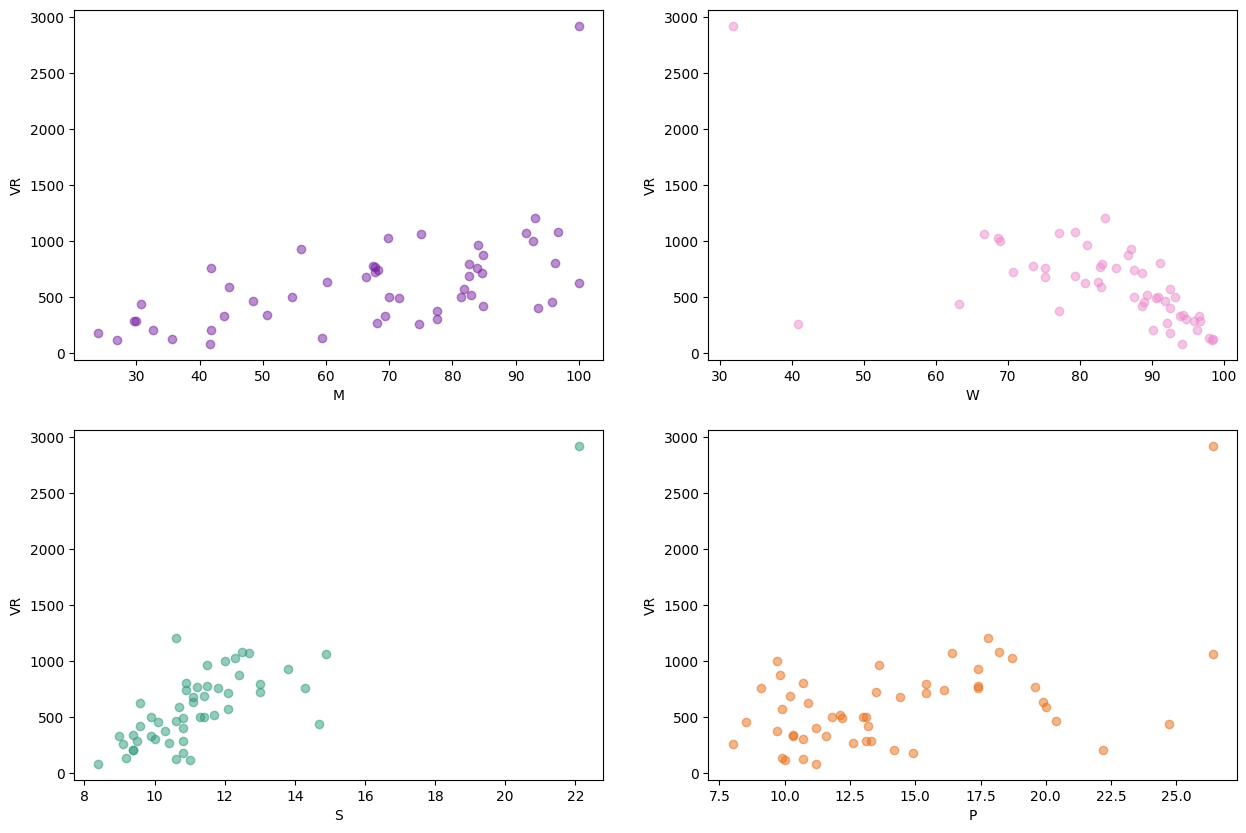

In [2]:
# Variable dependiente VR, variables independientes M, W,  S y P
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(df['M'], df['VR'],color='#76209e',alpha=0.5)
plt.xlabel('M')
plt.ylabel('VR')

plt.subplot(2, 2, 2)
plt.scatter(df['W'], df['VR'],color='#eb8dcb',alpha=0.5)
plt.xlabel('W')
plt.ylabel('VR')

plt.subplot(2, 2, 3)
plt.scatter(df['S'], df['VR'],color='#2b997a',alpha=0.5)
plt.xlabel('S')
plt.ylabel('VR')

plt.subplot(2, 2, 4)
plt.scatter(df['P'], df['VR'],color='#e66e19',alpha=0.5)
plt.xlabel('P')
plt.ylabel('VR')

## **Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.**


In [3]:
X = np.array(df[['M', 'W', 'S', 'P']])
Y = np.array(df['VR'])
# Se agrega una columna de unos para el término constante
X = np.c_[np.ones(X.shape[0]), X]
# Calcular los coeficientes
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y
print("Coeficientes:", coefficients)
# Calcular y_pred
y_pred = X @ coefficients

Coeficientes: [-1191.97437358     7.40434509    -3.50723304   120.35842821
    16.67071979]


In [4]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (51, 5)
Y shape: (51,)


## **Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.**

In [5]:
print('MSE: ', mean_squared_error(Y, y_pred))
print("MAE: ", mean_absolute_error(Y, y_pred))
print("R^2: ", r2_score(Y, y_pred))
# Evaluamos con validación cruzada
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)
mseVc = []
maeVc = []
r2Vc = []
for train_idx, test_idx in kf.split(X):
  # Fase de entrenamiento
  x_train = X[train_idx, :]
  y_train = Y[train_idx]
  regrVc = linear_model.LinearRegression()
  regrVc.fit(x_train, y_train)
  # Fase de prueba
  x_test = X[test_idx, :]
  y_test = Y[test_idx]
  y_pred = regrVc.predict(x_test)
  # Calculamos MSE, MAE y R^2
  mse_i = mean_squared_error(y_test, y_pred)
  mseVc.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  maeVc.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  r2Vc.append(r2_i)
print('MSE:', np.average(mseVc), ' MAE:', np.average(maeVc),' R^2:', np.average(r2Vc))

MSE:  29421.241673906927
MAE:  131.43775020760526
R^2:  0.8457637641373008
MSE: 53114.21173067888  MAE: 156.84789462239627  R^2: 0.5766457567874669


## **Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R2 (sólo si es el método de Monte Carlo), MSE y MAE.**

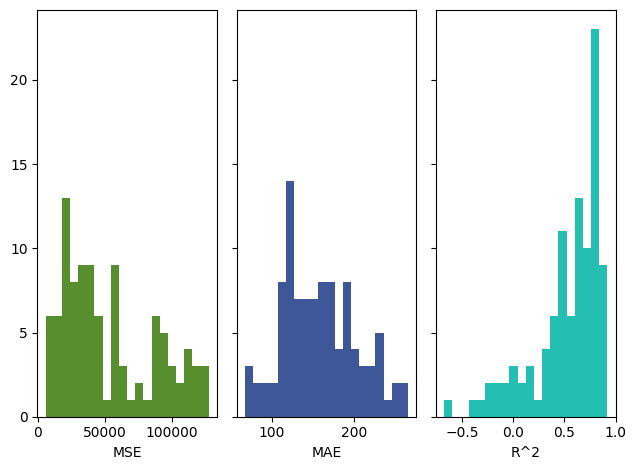

In [6]:
#Método de Monte Carlo
kf = ShuffleSplit(n_splits=100, test_size = 0.2)
mseVc = []
maeVc = []
r2Vc = []
for train_idx, test_idx in kf.split(X):
  # Fase de entrenamiento
  x_train = X[train_idx, :]
  y_train = Y[train_idx]
  regrVc = linear_model.LinearRegression()
  regrVc.fit(x_train, y_train)
  # Fase de prueba
  x_test = X[test_idx, :]
  y_test = Y[test_idx]
  y_pred = regrVc.predict(x_test)
  # Calculamos MSE, MAE y R^2
  mse_i = mean_squared_error(y_test, y_pred)
  mseVc.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  maeVc.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  r2Vc.append(r2_i)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(mseVc, bins=20,color='#588f2e')
axs[0].set_xlabel("MSE")
axs[1].hist(maeVc, bins=20,color='#3d5799')
axs[1].set_xlabel("MAE")
axs[2].hist(r2Vc, bins=20,color='#24bfb2')
axs[2].set_xlabel("R^2")
plt.show()

## **Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.**

In [7]:
df['M2'] = df['M'] ** 2
df['W2'] = df['W'] ** 2
df['S2'] = df['S'] ** 2
df['P2'] = df['P'] ** 2
df['MW'] = df['M'] * df['W']
df['MS'] = df['M'] * df['S']
df['MP'] = df['M'] * df['P']
df['WS'] = df['W'] * df['S']
df['WP'] = df['W'] * df['P']
df['SP'] = df['S'] * df['P']

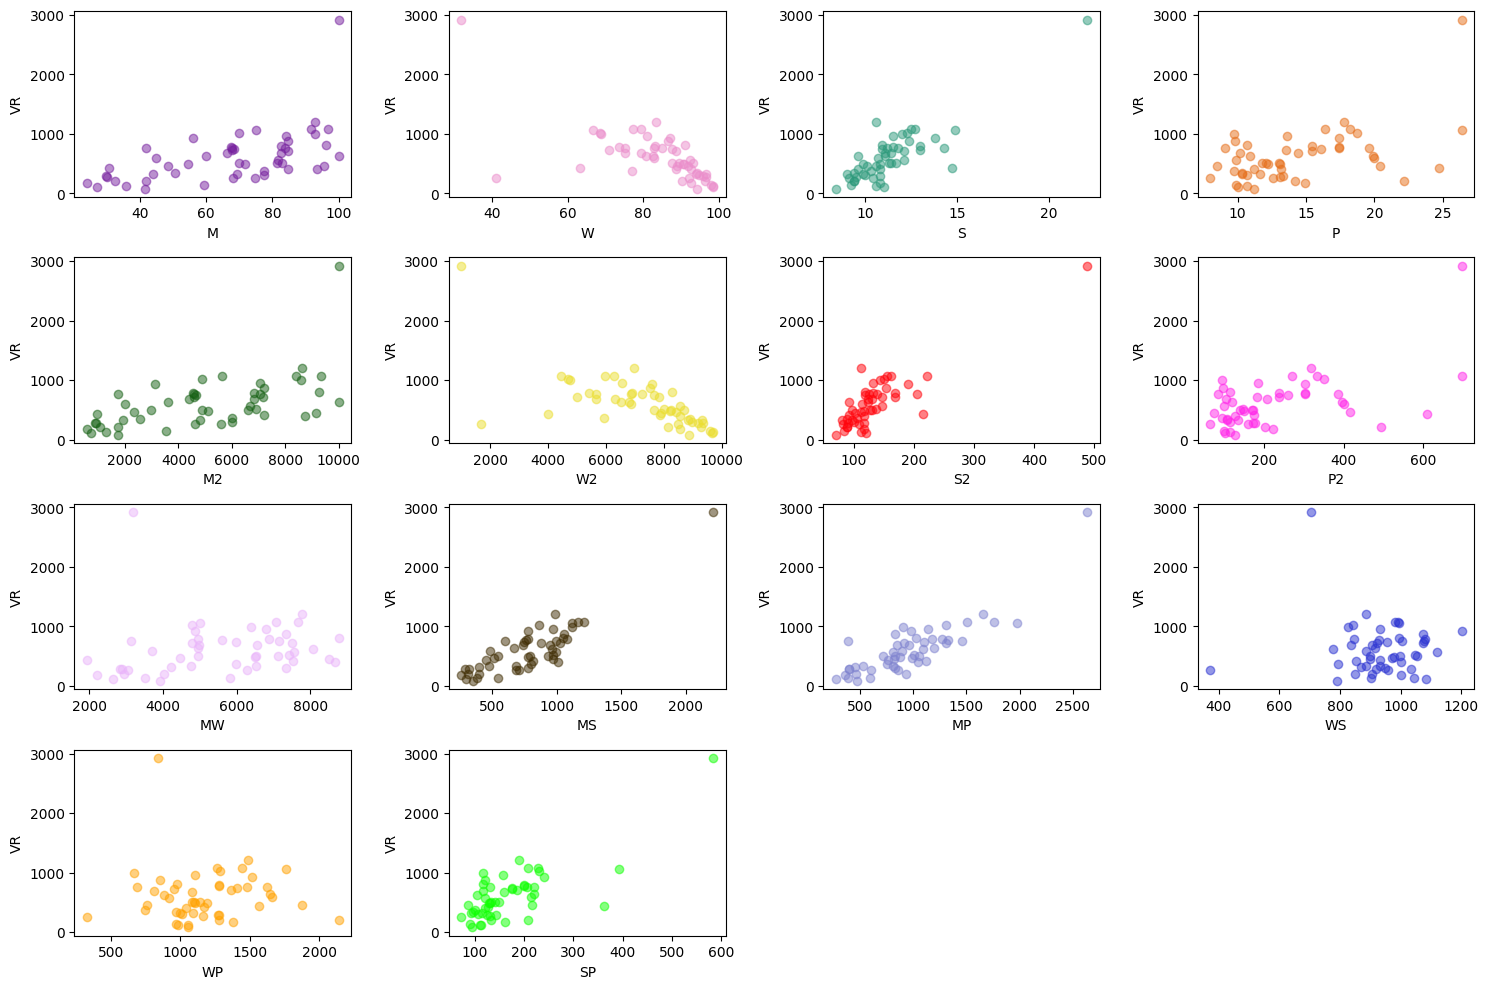

In [8]:
# Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.
# Variable dependiente VR, variables independientes M, W, S, P, M2, W2, S2, P2, MW, MS, MP, WS, WP, SP
plt.figure(figsize=(15, 10))

plt.subplot(4, 4, 1)
plt.scatter(df['M'], df['VR'], color='#76209e', alpha=0.5)
plt.xlabel('M')
plt.ylabel('VR')

plt.subplot(4, 4, 2)
plt.scatter(df['W'], df['VR'], color='#eb8dcb', alpha=0.5)
plt.xlabel('W')
plt.ylabel('VR')

plt.subplot(4, 4, 3)
plt.scatter(df['S'], df['VR'], color='#2b997a', alpha=0.5)
plt.xlabel('S')
plt.ylabel('VR')

plt.subplot(4, 4, 4)
plt.scatter(df['P'], df['VR'], color='#e66e19', alpha=0.5)
plt.xlabel('P')
plt.ylabel('VR')

plt.subplot(4, 4, 5)
plt.scatter(df['M2'], df['VR'], color='#166114', alpha=0.5)
plt.xlabel('M2')
plt.ylabel('VR')

plt.subplot(4, 4, 6)
plt.scatter(df['W2'], df['VR'], color='#ebde2f', alpha=0.5)
plt.xlabel('W2')
plt.ylabel('VR')

plt.subplot(4, 4, 7)
plt.scatter(df['S2'], df['VR'], color='#ff030b', alpha=0.5)
plt.xlabel('S2')
plt.ylabel('VR')

plt.subplot(4, 4, 8)
plt.scatter(df['P2'], df['VR'], color='#ff26e9', alpha=0.5)
plt.xlabel('P2')
plt.ylabel('VR')

plt.subplot(4, 4, 9)
plt.scatter(df['MW'], df['VR'], color='#eab4fa', alpha=0.5)
plt.xlabel('MW')
plt.ylabel('VR')

plt.subplot(4, 4, 10)
plt.scatter(df['MS'], df['VR'], color='#402d03', alpha=0.5)
plt.xlabel('MS')
plt.ylabel('VR')

plt.subplot(4, 4, 11)
plt.scatter(df['MP'], df['VR'], color='#7e82cf', alpha=0.5)
plt.xlabel('MP')
plt.ylabel('VR')

plt.subplot(4, 4, 12)
plt.scatter(df['WS'], df['VR'], color='#2830d1', alpha=0.5)
plt.xlabel('WS')
plt.ylabel('VR')

plt.subplot(4, 4, 13)
plt.scatter(df['WP'], df['VR'], color='#ffa200', alpha=0.5)
plt.xlabel('WP')
plt.ylabel('VR')

plt.subplot(4, 4, 14)
plt.scatter(df['SP'], df['VR'], color='#0dff00', alpha=0.5)
plt.xlabel('SP')
plt.ylabel('VR')

plt.tight_layout()
plt.show()

In [9]:
# Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.
X2 = df[['M', 'W', 'S', 'P', 'M2', 'W2', 'S2', 'P2', 'MW', 'MS', 'MP', 'WS', 'WP', 'SP']]
Y2 = df['VR']
# Se agrega una columna de unos para el término constante
X2 = np.c_[np.ones(X.shape[0]), X]
# Calcular los coeficientes
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y
print("Coeficientes:", coefficients)
# Calcular y_pred
y2_pred = X @ coefficients

Coeficientes: [-1191.97437358     7.40434509    -3.50723304   120.35842821
    16.67071979]


In [10]:
# Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.
print('MSE: ', mean_squared_error(Y2, y2_pred))
print("MAE: ", mean_absolute_error(Y2, y2_pred))
print("R^2: ", r2_score(Y2, y2_pred))
# Evaluamos con validación cruzada
kf = KFold(n_splits=5, shuffle = True)
mseVc = []
maeVc = []
r2Vc = []
for train_idx, test_idx in kf.split(X):
  # Fase de entrenamiento
  x_train = X2[train_idx, :]
  y_train = Y2[train_idx]
  regrVc = linear_model.LinearRegression()
  regrVc.fit(x_train, y_train)
  # Fase de prueba
  x_test = X2[test_idx, :]
  y_test = Y2[test_idx]
  y_pred = regrVc.predict(x_test)
  # Calculamos MSE, MAE y R^2
  mse_i = mean_squared_error(y_test, y_pred)
  mseVc.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  maeVc.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  r2Vc.append(r2_i)
print('MSE:', np.average(mseVc), ' MAE:', np.average(maeVc),' R^2:', np.average(r2Vc))

MSE:  29421.241673906927
MAE:  131.43775020760526
R^2:  0.8457637641373008
MSE: 51876.478107088  MAE: 158.00976012466853  R^2: 0.5853570884202337


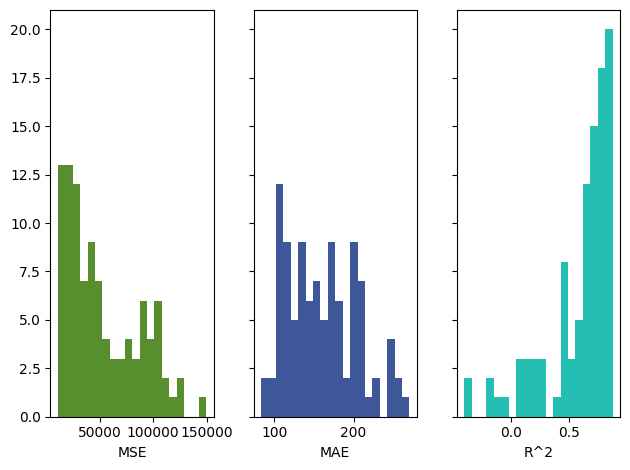

In [11]:
# Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R^2 (sólo si es el método de Monte Carlo), MSE y MAE.
#Método de Monte Carlo
kf = ShuffleSplit(n_splits=100, test_size = 0.2)
mseVc = []
maeVc = []
r2Vc = []
for train_idx, test_idx in kf.split(X):
  # Fase de entrenamiento
  x_train = X2[train_idx, :]
  y_train = Y2[train_idx]
  regrVc = linear_model.LinearRegression()
  regrVc.fit(x_train, y_train)
  # Fase de prueba
  x_test = X2[test_idx, :]
  y_test = Y2[test_idx]
  y_pred = regrVc.predict(x_test)
  # Calculamos MSE, MAE y R^2
  mse_i = mean_squared_error(y_test, y_pred)
  mseVc.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  maeVc.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  r2Vc.append(r2_i)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(mseVc, bins=20,color='#588f2e')
axs[0].set_xlabel("MSE")
axs[1].hist(maeVc, bins=20,color='#3d5799')
axs[1].set_xlabel("MAE")
axs[2].hist(r2Vc, bins=20,color='#24bfb2')
axs[2].set_xlabel("R^2")
plt.show()

## **Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).**

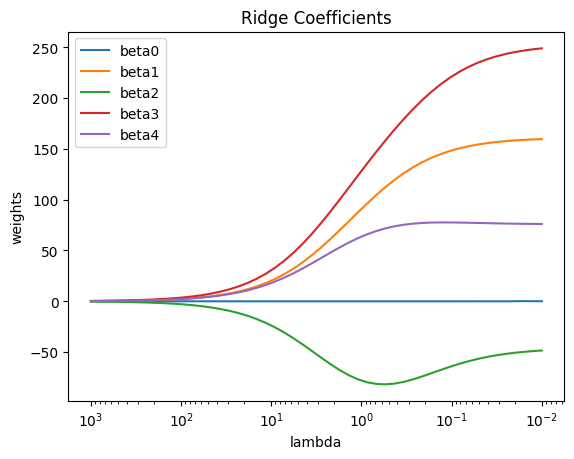

In [12]:
from sklearn.preprocessing import StandardScaler
def grad(X, y, beta, lambd):
  n = len(y)
  y_pred = X @ beta
  res = y - y_pred
  tmp = res*X.transpose()
  return -(2/n)*tmp.sum(axis = 1) + 2*lambd*beta

def fit_model(X, y, lambd = 0.1, alpha = 0.0005, maxit = 100000):
  npredictors = X.shape[1]

  beta = 2*np.random.rand(npredictors) - 1.0
  it = 0

  while(np.linalg.norm(grad(X, y, beta, lambd)) > 1e-4) and (it < maxit):
    beta = beta - alpha*grad(X, y, beta, lambd)
    it = it + 1

  return beta

lambdas = np.logspace(-2, 3, 50)
coefs = []

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

for l in lambdas:
  beta = fit_model(X_normalized, Y, l)
  coefs.append(beta)

axis = plt.gca()
lineObjects = axis.plot(lambdas, coefs)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge Coefficients')
plt.axis('tight')

features = ['beta'+str(feat) for feat in range(coefs[0].shape[0])]
axis.legend(iter(lineObjects), features)

## **Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado)**

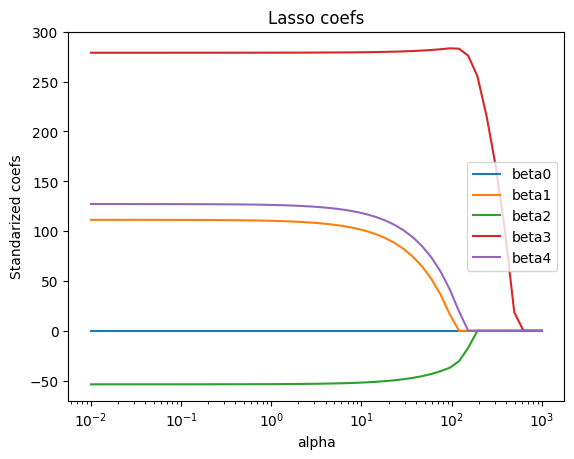

In [13]:
X_train,x_test,y_train,y_test=train_test_split(X_normalized,Y,test_size=0.4,random_state=42)
alphas = np.logspace(-2, 3, 50)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

ax = plt.gca()

lineObjects = ax.plot(alphas,coefs)
ax.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standarized coefs')
plt.title('Lasso coefs')
features = ['beta'+str(feat) for feat in range(coefs[0].shape[0])]
ax.legend(iter(lineObjects), features)

## ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?
Considero que el modelo de regresión lineal para este conjunto de datos resulta efectivo sobre todo en el análisis de los datos. Empezando con los valores del R^2 los resultados en el paso 2 arrojan que son  alrededor de 0.85, sinónimo de que es un número alto, lo que podría implicar que el modelo explica el 85% de la variabilidad de los datos observados y esto se debe a que proporciona una interpretación clara de los datos. En consecutiva, los resultados dados para el promedio de los errores medios al cuadrado, MSE, y los errores medios absolutos, MAE, indicaron valores bajos lo cual interprete que las predicciones del modelo se ajustan a los valores reales y que el modelo representa los datos con precisión. Dando como conclusión que sobre los resultados obtenidos, se sugiere que el modelo de regresión lineal puede capturar las relaciones subyacentes entre las variables predictoras relacionados con mi matricula (la proporción de zonas urbanas, las personas blancas, las que tienen un solo tutor y la pobreza) y la delincuencia violenta.

## ¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada?
Sí, hay cierta variabilidad en los valores de R^2, MSE y MAE al aplicar validación cruzada. Esto se puede esperar en realidad porque puede deberse a diferentes particiones de los datos en cada pliegue, así como a la variabilidad inherente en los datos. Aunque hay variabilidad, los valores generales son coherentes y muestran que el modelo tiene un rendimiento bastante sólido.

## ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?
Considerando los resultados obtenidos, parece que el modelo lineal es más apropiado para abordar los datos de criminalidad en comparación con el modelo cuadrático. Esto es porque, aunque ambos modelos comparten coeficientes similares, el modelo lineal supera en métricas clave.

Entrando brevemente en profundidad del argumento, el modelo lineal exhibe una R^2 más elevada, situándose alrededor de 0.85 indicando que el 85% de la variabilidad en los datos de crímenes violentos puede ser explicada por las variables predictoras del modelo mientras que el modelo cuadrático puede presentar una menor capacidad de explicación debido a su forma más compleja. Además, los errores medios cuadrados y errores absolutos medios del modelo lineal son considerablemente más bajos que los del modelo cuadrático y se ajustan de manera más efectiva, terminando por ser un factor esencial en la evaluación y predicción de eventos criminales.

## ¿Qué variables son más relevantes para el modelo según Ride y Lasso?

Iniciando por hablar sobre si un coeficiente asociado a una variable es cercano a cero, indica que esa variable podría tener un impacto limitado en el modelo. En este caso, el coeficiente para la variable W (porcentaje de gente blanca) es cercano a cero, lo que sugiere que podría tener una influencia limitada en las predicciones del modelo.
Mientras que si nos basamos en los resultados de los otros coeficientes, las variables más relevantes para el modelo según Ridge y Lasso son S (porcentaje de familias con solo un miembro adulto como tutor) y P (porcentaje con ingresos por debajo del nivel de pobreza).  La variable S tiene el coeficiente más alto, lo que sugiere una influencia fuerte en la variable de respuesta, por otro lado, la variable P también tiene un coeficiente ligeramente alta pero menor a S, indicando su contribución significativa al modelo. En contraste, la variable M tiene un coeficiente moderado, dando por concluir que su influencia es relativamente menor.

## ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?
Si, tomando en cuenta los resultados de la anterior respuesta sobre el coeficiente elevado de la variable S (porcentaje de familias con solo un miembro adulto como tutor) se puede sugerir que la estructura familiar podría tener una fuerte asociación con los crímenes violentos. Además, que el aumento en el porcentaje de personas con ingresos por debajo del nivel de pobreza (P) parece vincularse con un incremento en los crímenes, posiblemente reflejando contextos socioeconómicos adversos. La variable M (porcentaje de áreas metropolitanas) por otra parte, contribuye moderadamente, indicando que los entornos urbanos podrían influir. No obstante, la variable W (porcentaje de gente blanca) con su coeficiente cercano a cero podría implicar una relación menos directa. Estas relaciones complejas resaltan cómo factores socioeconómicos y familiares podrían desempeñar roles cruciales en la dinámica de los crímenes violentos, ofreciendo perspectivas esclarecedoras en la formulación de estrategias preventivas y políticas adecuadas.

## Ejercicio 2
El conjunto de datos de esperanzas de vida (Life Expectancy (WHO) | Kaggle Links to an external site.) tiene el registro de la esperanza de vida de 193 países medida en diferentes años, junto con otras variables que se pueden relacionar con riesgos a la salud y la mortalidad. Para este ejercicio, sólo se considerará como variable dependiente la cuarta columna ("Life expectancy"). A su vez, las variables independientes de interés son:

* X1 - Adult mortality
* X2 - Infant deaths
* X3 - Alcohol
* X4 - Percentage expenditure
* X5 - Hepatitis B
* X6 - Measles
*    X7 - BMI
*    X8 - Under-five deaths
*    X9 - Polio
*    X10 - Total expenditure
*    X11 - Diphtheria
*    X12 - HIV/AIDS   
*    X13 - GDP
*    X14 - Population
*    X15 - Thinness  1-19 years
*    X16 - Thinness 5-9 years
*    X17 - Income composition of resources
*    X18 - Schooling


In [14]:
# Cargar el dataset para el problema 2
df = pd.read_csv('/content/life_expectancy_data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [15]:
# Identificar los valores nulos en el dataset
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [16]:
#Debido a que tenemos valores nulos procedemos a imputar valores
# Calculamos la media de las columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
columnas_media = df[columnas_numericas].mean()

# Llenamos los valores nulos con las medias calculadas por columna
df_cleaned = df.fillna(columnas_media)

## 1-. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [17]:
# El penúltimo número de tu matrícula es 9, A01640092
# Seleccionamos las columnas relevantes acorde
df_cleaned = df_cleaned.drop(['Hepatitis B', 'Polio', 'GDP', 'Income composition of resources'], axis=1)
df_cleaned

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,42,7.13,65.0,33.6,12777511.0,9.4,9.4,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,41,6.52,68.0,36.7,12633897.0,9.8,9.9,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,40,6.53,71.0,39.8,125525.0,1.2,1.3,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,39,6.16,75.0,42.1,12366165.0,1.6,1.7,9.8


In [18]:
# Definir la variable dependiente (y) y las variables independientes (X)
X = df_cleaned.drop('Life expectancy ', axis=1)
y = df_cleaned['Life expectancy ']

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Country'] = label_encoder.fit_transform(X['Country'])
X['Status'] = label_encoder.fit_transform(X['Status'])
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, r_regression,f_regression
# Creamomos el modelo de regresión lineal
model = LinearRegression()

# Realizamos validación cruzada y obtener el score R2
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Imprimir los scores de la validación cruzada
print("Scores de validación cruzada:", scores)
print("Score promedio:", scores.mean())

Scores de validación cruzada: [0.81400384 0.8005482  0.77927391 0.70250422 0.80604946]
Score promedio: 0.7804759231793174


## 2-. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [21]:
# Evaluar la selección secuencial de características mediante validación cruzada
mseCV = []
maeCV = []
r2CV = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    # Fase de entrenamiento
    X_train = X[train_index, :]
    y_train = y[train_index]
    fselectionCV = SelectKBest(r_regression, k=5)
    fselectionCV.fit(X_train, y_train)
    X_train = fselectionCV.transform(X_train)
    regrCV = linear_model.LinearRegression()
    regrCV.fit(X_train, y_train)
    # Fase de prueba
    x_test = fselectionCV.transform(X[test_index, :])
    y_test = y[test_index]
    y_pred = regrCV.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV.append(r2_i)
print('MSE promedio:', np.average(mseCV), ' MAE promedio:', np.average(maeCV), ' R^2 promedio:', np.average(r2CV))

MSE promedio: 35.27690252023642  MAE promedio: 4.431497766227963  R^2 promedio: 0.6093181821861224


In [22]:
# Encontrar el número óptimo de características mediante validación cruzada
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat = []
maeNfeat = []
r2Nfeat = []
for n_feat in nFeats:
    print('---- n características =', n_feat)
    mseCV = []
    maeCV = []
    r2CV = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        # Fase de entrenamiento
        X_train = X[train_index, :]
        y_train = y[train_index]
        fselectionCV = SelectKBest(r_regression, k=n_feat)
        fselectionCV.fit(X_train, y_train)
        X_train = fselectionCV.transform(X_train)
        regrCV = linear_model.LinearRegression()
        regrCV.fit(X_train, y_train)
        # Fase de prueba
        x_test = fselectionCV.transform(X[test_index, :])
        y_test = y[test_index]
        y_pred = regrCV.predict(x_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV.append(r2_i)
    mse = np.average(mseCV)
    mseNfeat.append(mse)
    mae = np.average(maeCV)
    maeNfeat.append(mae)
    r2 = np.average(r2CV)
    r2Nfeat.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

---- n características = 1
---- n características = 2
---- n características = 3
---- n características = 4
---- n características = 5
---- n características = 6
---- n características = 7
---- n características = 8
---- n características = 9
Número óptimo de características: 6


## 3-. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.


In [23]:
from sklearn.feature_selection import SequentialFeatureSelector
# Evaluar la selección secuencial de características mediante validación cruzada
mseCV = []
maeCV = []
r2CV = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    # Fase de entrenamiento
    X_train = X[train_index, :]
    y_train = y[train_index]
    regrCV = linear_model.LinearRegression()
    fselectionCV = SequentialFeatureSelector(regrCV, n_features_to_select=0.5)
    fselectionCV.fit(X_train, y_train)
    X_train = fselectionCV.transform(X_train)
    regrCV.fit(X_train, y_train)
    # Fase de prueba
    X_test = fselectionCV.transform(X[test_index, :])
    y_test = y[test_index]
    y_pred = regrCV.predict(X_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV.append(r2_i)
print('MSE promedio:', np.average(mseCV), ' MAE promedio:', np.average(maeCV), ' R^2 promedio:', np.average(r2CV))

MSE promedio: 18.542667517350615  MAE promedio: 3.217982085314631  R^2 promedio: 0.7945380214022377


In [24]:
# Encontrar el número óptimo de características mediante validación cruzada
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat = []
maeNfeat = []
r2Nfeat = []
for n_feat in nFeats:
    print('---- n características =', n_feat)
    mseCV = []
    maeCV = []
    r2CV = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        # Fase de entrenamiento
        X_train = X[train_index, :]
        y_train = y[train_index]
        regrCV = linear_model.LinearRegression()
        fselectionCV = SequentialFeatureSelector(regrCV,n_features_to_select=n_feat)
        fselectionCV.fit(X_train, y_train)
        X_train = fselectionCV.transform(X_train)
        regrCV.fit(X_train, y_train)
        # Fase de prueba
        X_test = fselectionCV.transform(X[test_index, :])
        y_test = y[test_index]
        y_pred = regrCV.predict(X_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV.append(r2_i)
    mse = np.average(mseCV)
    mseNfeat.append(mse)
    mae = np.average(maeCV)
    maeNfeat.append(mae)
    r2 = np.average(r2CV)
    r2Nfeat.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

---- n características = 1
---- n características = 2
---- n características = 3
---- n características = 4
---- n características = 5
---- n características = 6
---- n características = 7
---- n características = 8
---- n características = 9
Número óptimo de características: 9


## 4-. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

In [25]:
from sklearn.feature_selection import RFE
# Evaluar la selección secuencial de características mediante validación cruzada
mseCV = []
maeCV = []
r2CV = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    # Fase de entrenamiento
    X_train = X[train_index, :]
    y_train = y[train_index]
    regrCV = linear_model.LinearRegression()
    fselectionCV = RFE(regrCV, n_features_to_select=0.5)
    fselectionCV.fit(X_train, y_train)
    X_train = fselectionCV.transform(X_train)
    regrCV.fit(X_train, y_train)
    # Fase de prueba
    X_test = fselectionCV.transform(X[test_index, :])
    y_test = y[test_index]
    y_pred = regrCV.predict(X_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV.append(r2_i)
print('MSE promedio:', np.average(mseCV), ' MAE promedio:', np.average(maeCV), ' R^2 promedio:', np.average(r2CV))

MSE promedio: 22.325028864558085  MAE promedio: 3.6104425619751814  R^2 promedio: 0.7518579064861026


In [26]:
# Encontrar el número óptimo de características mediante validación cruzada
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat = []
maeNfeat = []
r2Nfeat = []
for n_feat in nFeats:
    print('---- n características =', n_feat)
    mseCV = []
    maeCV = []
    r2CV = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        # Fase de entrenamiento
        X_train = X[train_index, :]
        y_train = y[train_index]
        regrCV = linear_model.LinearRegression()
        fselectionCV = RFE(regrCV,n_features_to_select=n_feat)
        fselectionCV.fit(X_train, y_train)
        X_train = fselectionCV.transform(X_train)
        regrCV.fit(X_train, y_train)
        # Fase de prueba
        X_test = fselectionCV.transform(X[test_index, :])
        y_test = y[test_index]
        y_pred = regrCV.predict(X_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV.append(r2_i)
    mse = np.average(mseCV)
    mseNfeat.append(mse)
    mae = np.average(maeCV)
    maeNfeat.append(mae)
    r2 = np.average(r2CV)
    r2Nfeat.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

---- n características = 1
---- n características = 2
---- n características = 3
---- n características = 4
---- n características = 5
---- n características = 6
---- n características = 7
---- n características = 8
---- n características = 9
Número óptimo de características: 9


## 5-. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

####  5.1 Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [27]:
from sklearn.neighbors import KNeighborsRegressor

# Crear un modelo de regresión no lineal con K-Vecinos Más Cercanos
model = KNeighborsRegressor()

# Evaluar con validación cruzada utilizando R2 como métrica
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Scores de validación cruzada con KNN (R2):", scores)
print("Score promedio (R2):", scores.mean())

Scores de validación cruzada con KNN (R2): [ 0.02982587 -0.20627779 -0.2227258  -0.07466868 -0.04766122]
Score promedio (R2): -0.10430152408587086


#### 5.2 Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [28]:
# Evaluar la selección secuencial de características mediante validación cruzada con KNN
mseCV_knn = []
maeCV_knn = []
r2CV_knn = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    # Fase de entrenamiento
    X_train = X[train_index, :]
    y_train = y[train_index]
    fselectionCV = SelectKBest(f_regression, k=5)
    fselectionCV.fit(X_train, y_train)
    X_train = fselectionCV.transform(X_train)
    model_knn = KNeighborsRegressor()  # Crear modelo KNN
    model_knn.fit(X_train, y_train)
    # Fase de prueba
    x_test = fselectionCV.transform(X[test_index, :])
    y_test = y[test_index]
    y_pred = model_knn.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV_knn.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV_knn.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV_knn.append(r2_i)
print('MSE promedio con KNN:', np.average(mseCV_knn), ' MAE promedio con KNN:', np.average(maeCV_knn), ' R^2 promedio con KNN:', np.average(r2CV_knn))

MSE promedio con KNN: 6.982958004185224  MAE promedio con KNN: 1.8088715774326043  R^2 promedio con KNN: 0.9227025868726813


In [29]:
# Encontrar el número óptimo de características mediante validación cruzada con KNN
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat_knn = []
maeNfeat_knn = []
r2Nfeat_knn = []
for n_feat in nFeats:
    print('---- n características =', n_feat)
    mseCV_knn = []
    maeCV_knn = []
    r2CV_knn = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        # Fase de entrenamiento
        X_train = X[train_index, :]
        y_train = y[train_index]
        fselectionCV = SelectKBest(f_regression, k=n_feat)
        fselectionCV.fit(X_train, y_train)
        X_train = fselectionCV.transform(X_train)
        model_knn = KNeighborsRegressor()  # Crear modelo KNN
        model_knn.fit(X_train, y_train)
        # Fase de prueba
        x_test = fselectionCV.transform(X[test_index, :])
        y_test = y[test_index]
        y_pred = model_knn.predict(x_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV_knn.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV_knn.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV_knn.append(r2_i)
    mse = np.average(mseCV_knn)
    mseNfeat_knn.append(mse)
    mae = np.average(maeCV_knn)
    maeNfeat_knn.append(mae)
    r2 = np.average(r2CV_knn)
    r2Nfeat_knn.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

---- n características = 1
---- n características = 2
---- n características = 3
---- n características = 4
---- n características = 5
---- n características = 6
---- n características = 7
---- n características = 8
---- n características = 9
Número óptimo de características: 9


#### 5.3 Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.



In [30]:
# Evaluar la selección secuencial de características mediante validación cruzada con KNN
mseCV_knn = []
maeCV_knn = []
r2CV_knn = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    # Fase de entrenamiento
    X_train = X[train_index, :]
    y_train = y[train_index]
    model_knn = KNeighborsRegressor()  # Crear modelo KNN
    fselectionCV_knn = SequentialFeatureSelector(model_knn, n_features_to_select=0.5)
    fselectionCV_knn.fit(X_train, y_train)
    X_train = fselectionCV_knn.transform(X_train)
    model_knn.fit(X_train, y_train)
    # Fase de prueba
    X_test = fselectionCV_knn.transform(X[test_index, :])
    y_test = y[test_index]
    y_pred = model_knn.predict(X_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV_knn.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV_knn.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV_knn.append(r2_i)
print('MSE promedio con KNN:', np.average(mseCV_knn), ' MAE promedio con KNN:', np.average(maeCV_knn), ' R^2 promedio con KNN:', np.average(r2CV_knn))

MSE promedio con KNN: 5.580444454680991  MAE promedio con KNN: 1.5836418208568652  R^2 promedio con KNN: 0.9380271228164526


In [31]:
# Encontrar el número óptimo de características mediante validación cruzada con KNN
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat_knn = []
maeNfeat_knn = []
r2Nfeat_knn = []
for n_feat in nFeats:
    print('---- n características =', n_feat)
    mseCV_knn = []
    maeCV_knn = []
    r2CV_knn = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        # Fase de entrenamiento
        X_train = X[train_index, :]
        y_train = y[train_index]
        model_knn = KNeighborsRegressor()  # Crear modelo KNN
        fselectionCV_knn = SequentialFeatureSelector(model_knn, n_features_to_select=n_feat)
        fselectionCV_knn.fit(X_train, y_train)
        X_train = fselectionCV_knn.transform(X_train)
        model_knn.fit(X_train, y_train)
        # Fase de prueba
        X_test = fselectionCV_knn.transform(X[test_index, :])
        y_test = y[test_index]
        y_pred = model_knn.predict(X_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV_knn.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV_knn.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV_knn.append(r2_i)
    mse = np.average(mseCV_knn)
    mseNfeat_knn.append(mse)
    mae = np.average(maeCV_knn)
    maeNfeat_knn.append(mae)
    r2 = np.average(r2CV_knn)
    r2Nfeat_knn.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

---- n características = 1
---- n características = 2
---- n características = 3
---- n características = 4
---- n características = 5
---- n características = 6
---- n características = 7
---- n características = 8
---- n características = 9
Número óptimo de características: 9


#### 5.4 Haz el mismo proceso del paso 5.2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

In [32]:
from sklearn.ensemble import RandomForestRegressor
# Aplicamos modelo no lineal K-vecinos más cercanos (KNN)
mseCV_knn = []
maeCV_knn = []
r2CV_knn = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    # Fase de entrenamiento
    X_train = X[train_index, :]
    y_train = y[train_index]
    model_knn = RandomForestRegressor()
    model_knn.fit(X_train, y_train)
    # Fase de prueba
    X_test = X[test_index, :]
    y_test = y[test_index]
    y_pred = model_knn.predict(X_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV_knn.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV_knn.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV_knn.append(r2_i)
print('MSE promedio con KNN:', np.average(mseCV_knn), ' MAE promedio con KNN:', np.average(maeCV_knn), ' R^2 promedio con KNN:', np.average(r2CV_knn))

MSE promedio con KNN: 3.3542603258194403  MAE promedio con KNN: 1.129167071164606  R^2 promedio con KNN: 0.9628447068781624


In [33]:
# Encontrar el número óptimo de características mediante validación cruzada con KNN
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat_knn = []
maeNfeat_knn = []
r2Nfeat_knn = []
for n_feat in nFeats:
    print('---- n características =', n_feat)
    mseCV_knn = []
    maeCV_knn = []
    r2CV_knn = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        # Fase de entrenamiento
        X_train = X[train_index, :]
        y_train = y[train_index]
        model_knn = RandomForestRegressor()
        fselectionCV_knn = RFE(model_knn, n_features_to_select=n_feat)
        fselectionCV_knn.fit(X_train, y_train)
        X_train = fselectionCV_knn.transform(X_train)
        model_knn.fit(X_train, y_train)
        # Fase de prueba
        X_test = fselectionCV_knn.transform(X[test_index, :])
        y_test = y[test_index]
        y_pred = model_knn.predict(X_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV_knn.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV_knn.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV_knn.append(r2_i)
    mse = np.average(mseCV_knn)
    mseNfeat_knn.append(mse)
    mae = np.average(maeCV_knn)
    maeNfeat_knn.append(mae)
    r2 = np.average(r2CV_knn)
    r2Nfeat_knn.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

---- n características = 1
---- n características = 2
---- n características = 3
---- n características = 4
---- n características = 5
---- n características = 6
---- n características = 7
---- n características = 8
---- n características = 9
Número óptimo de características: 9


## 6 Agregue la variables "Status" (segunda columna) como variable predictora, y utiliza un árbol de decisión para generar un modelo de regresión para la varible Life expectancy". Evalúa este modelo con validación cruzada utilizando la métrica adecuada.

In [34]:
from sklearn.tree import DecisionTreeRegressor
# Variables independientes (X) y variable dependiente (y)
X = df_cleaned.drop('Life expectancy ', axis=1)  # Eliminamos la columna objetivo
X['Status'] = df_cleaned['Status']  # Agregamos la columna "Status" como variable predictora

label_encoder = LabelEncoder()
X['Country'] = label_encoder.fit_transform(X['Country'])
X['Status'] = label_encoder.fit_transform(X['Status'])
X = np.array(X)

# Crear un modelo de regresión con árbol de decisión
model = DecisionTreeRegressor()

# Realizar validación cruzada y obtener el score R2
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Imprimir los scores de la validación cruzada
print("Scores de validación cruzada (R2):", scores)
print("Score promedio (R2):", scores.mean())

Scores de validación cruzada (R2): [0.79780778 0.80571285 0.81296517 0.83809101 0.86052712]
Score promedio (R2): 0.8230207844642757


### 7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:
* Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?

El modelo de regresión lineal parece ajustarse en cierta medida a los datos. Las puntuaciones de validación cruzada en torno a 0,78 muestran que el modelo puede captar parte de la variabilidad de la esperanza de vida a partir de los factores independientes identificados. Sin embargo, es evidente que existen correlaciones no lineales y complicadas en los datos que no pueden captarse adecuadamente mediante un planteamiento lineal.
* ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?

El método de selección de características secuencial (Wrapper) parece funcionar bien con los datos. Al elegir todas las características accesibles (9) como ideales, esta técnica implica que se necesite un gran conjunto de características para obtener un rendimiento de predicción superior por lo que podría en conclusión decirse que numerosos factores contribuyen a la variación de la esperanza de vida.
* Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?

Algunas variables sobresalientes que pude descubrir fueron el gasto sanitario (X4), el índice de masa corporal (X7), la mortalidad de menores de cinco años (X8), el gasto sanitario total (X10), la tasa de difteria (X11) y el VIH/SIDA (X12). La razón de que sean más significantes sobre las otras es que los rasgos de estas características  están sustancialmente relacionadas con la salud pública, el desarrollo y la calidad de vida de un país, lo que tiene sentido concluir que en términos de influencia si tienen sobre la esperanza de vida de un humano.

* ¿El modelo de regresión no lineal funcionó mejor que el lineal? ¿Por qué?

Sí, el modelo de regresión no lineal (KNN) funcionó mejor que el modelo lineal en términos de métricas de evaluación. Esto es probable debido a la naturaleza no lineal y compleja de las relaciones entre las variables y la esperanza de vida en los datos. Aparte, el KNN tiene la capacidad de capturar estas relaciones no lineales, lo que resulta en un mejor rendimiento predictivo.
* ¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"? ¿Por qué?

Agregar la variable categórica "Status" como predictor y utilizar un árbol de decisión mejoró el rendimiento del modelo de regresión en comparación con el modelo lineal. Esto indica que el estado de desarrollo económico de un país es un factor relevante en la determinación de la esperanza de vida. Los árboles de decisión pueden capturar interacciones complejas y no lineales entre variables categóricas y numéricas, lo que explica esta mejora.
* ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.

En conjunto, estos resultados resaltan la complejidad de las relaciones que influyen en la esperanza de vida. Mientras que un modelo lineal proporciona cierta información sobre estas relaciones, un enfoque no lineal como KNN y la inclusión de características relevantes y la variable categórica "Status" mejoran significativamente la capacidad del modelo para explicar la variabilidad observada en la esperanza de vida.

